<h1>Data Exploration and Cleaning</h1>

In [1]:
import pandas

<h2>Daily Activity</h2>

In [2]:
daily_activity = pandas.read_csv("dailyActivity_merged.csv")

In [3]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [5]:
daily_activity["ActivityDate"] = pandas.to_datetime(daily_activity["ActivityDate"], format = "%m/%d/%Y")

In [6]:
daily_activity.dtypes

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [7]:
daily_activity.shape

(940, 15)

In [8]:
len(daily_activity["Id"].unique())

33

In [9]:
daily_activity["Id"].value_counts()

1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: Id, dtype: int64

In [10]:
daily_activity.isna().values.any()

False

In [11]:
daily_activity.duplicated().any()

False

In [12]:
daily_activity = daily_activity.loc[:, ("Id", "ActivityDate", "TotalSteps", "SedentaryMinutes", "Calories")]

In [13]:
daily_activity_steps = daily_activity.loc[:, ("Id", "ActivityDate", "TotalSteps")]
daily_activity_steps["ActivityDate"] = daily_activity_steps["ActivityDate"].dt.date

<h2>Checking the Consistency of Data on Calories</h2>

In [14]:
daily_activity_calories = daily_activity.copy().loc[:, ("Id", "ActivityDate", "Calories")]
daily_activity_calories["ActivityDate"] = daily_activity_calories["ActivityDate"].dt.date

In [15]:
daily_calories = pandas.read_csv("dailyCalories_merged.csv")

In [16]:
daily_calories["ActivityDay"] = pandas.to_datetime(daily_calories["ActivityDay"], format = "%m/%d/%Y")

In [17]:
daily_calories["ActivityDay"] = daily_calories["ActivityDay"].dt.date
daily_calories = daily_calories.rename(columns={"Calories": "DailyCalories"})

In [18]:
hourly_calories = pandas.read_csv("hourlyCalories_merged.csv")

In [19]:
hourly_calories["ActivityHour"] = pandas.to_datetime(hourly_calories["ActivityHour"], format = "%m/%d/%Y %I:%M:%S %p")

In [20]:
hourly_calories_added = hourly_calories.copy()
hourly_calories_added["ActivityHour"] = hourly_calories_added["ActivityHour"].dt.date

In [21]:
hourly_calories_added = hourly_calories_added.groupby(["Id", "ActivityHour"]).sum().reset_index().rename(columns={"Calories": "HourlyCaloriesAdded"})

In [22]:
minute_calories_narrow = pandas.read_csv("minuteCaloriesNarrow_merged.csv")

In [23]:
minute_calories_narrow["ActivityMinute"] = pandas.to_datetime(minute_calories_narrow["ActivityMinute"], format = "%m/%d/%Y %I:%M:%S %p")

In [24]:
minute_calories_added = minute_calories_narrow.copy()
minute_calories_added["ActivityMinute"] = minute_calories_added["ActivityMinute"].dt.date

In [25]:
minute_calories_added = minute_calories_added.groupby(["Id", "ActivityMinute"]).sum().round().rename(columns={"Calories":"MinuteCaloriesAdded"})

In [26]:
calorie_consistency_test = pandas.merge(daily_activity_calories, daily_calories, left_on=["Id", "ActivityDate"], right_on=["Id", "ActivityDay"], how="inner")
calorie_consistency_test = pandas.merge(calorie_consistency_test, hourly_calories_added, left_on=["Id", "ActivityDate"], right_on=["Id", "ActivityHour"], how="inner")
calorie_consistency_test = pandas.merge(calorie_consistency_test, minute_calories_added, left_on=["Id", "ActivityDate"], right_on=["Id", "ActivityMinute"], how="inner")
calorie_consistency_test.head()

,Id,ActivityDate,Calories,ActivityDay,DailyCalories,ActivityHour,HourlyCaloriesAdded,MinuteCaloriesAdded
0,1503960366,2016-04-12,1985,2016-04-12,1985,2016-04-12,1988,1985.0
1,1503960366,2016-04-13,1797,2016-04-13,1797,2016-04-13,1798,1798.0
2,1503960366,2016-04-14,1776,2016-04-14,1776,2016-04-14,1776,1777.0
3,1503960366,2016-04-15,1745,2016-04-15,1745,2016-04-15,1745,1745.0
4,1503960366,2016-04-16,1863,2016-04-16,1863,2016-04-16,1866,1864.0


In [27]:
calorie_consistency_test[(calorie_consistency_test["Calories"] == calorie_consistency_test["HourlyCaloriesAdded"]) & 
                                    (calorie_consistency_test["Calories"] == (calorie_consistency_test["MinuteCaloriesAdded"]))].head()

,Id,ActivityDate,Calories,ActivityDay,DailyCalories,ActivityHour,HourlyCaloriesAdded,MinuteCaloriesAdded
3,1503960366,2016-04-15,1745,2016-04-15,1745,2016-04-15,1745,1745.0
15,1503960366,2016-04-27,2159,2016-04-27,2159,2016-04-27,2159,2159.0
36,1624580081,2016-04-18,1604,2016-04-18,1604,2016-04-18,1604,1604.0
44,1624580081,2016-04-26,1402,2016-04-26,1402,2016-04-26,1402,1402.0
50,1624580081,2016-05-02,1497,2016-05-02,1497,2016-05-02,1497,1497.0


In [28]:
calorie_consistency_test[calorie_consistency_test["Calories"] != calorie_consistency_test["HourlyCaloriesAdded"]].head()

,Id,ActivityDate,Calories,ActivityDay,DailyCalories,ActivityHour,HourlyCaloriesAdded,MinuteCaloriesAdded
0,1503960366,2016-04-12,1985,2016-04-12,1985,2016-04-12,1988,1985.0
1,1503960366,2016-04-13,1797,2016-04-13,1797,2016-04-13,1798,1798.0
4,1503960366,2016-04-16,1863,2016-04-16,1863,2016-04-16,1866,1864.0
5,1503960366,2016-04-17,1728,2016-04-17,1728,2016-04-17,1730,1728.0
6,1503960366,2016-04-18,1921,2016-04-18,1921,2016-04-18,1920,1922.0


In [29]:
calorie_consistency_test['MergedToDailyPercentDifference'] = calorie_consistency_test.apply(
    lambda row: (abs(row['Calories'] - row['DailyCalories']) / row['DailyCalories']) * 100 if row['DailyCalories'] > 0 else (6 if row['DailyCalories'] == 0 and row["Calories"] > 0 else 0), axis=1)

In [30]:
calorie_consistency_test['MergedtoHourlyPercentDifference'] = calorie_consistency_test.apply(
    lambda row: (abs(row['Calories'] - row['HourlyCaloriesAdded']) / row['HourlyCaloriesAdded']) * 100 if row['HourlyCaloriesAdded'] > 0 else (6 if row['HourlyCaloriesAdded'] == 0 and row["Calories"] > 0 else 0), axis=1)

In [31]:
calorie_consistency_test['MergedtoMinutePercentDifference'] = calorie_consistency_test.apply(
    lambda row: (abs(row['Calories'] - row['MinuteCaloriesAdded']) / row['MinuteCaloriesAdded']) * 100 if row['MinuteCaloriesAdded'] > 0 else (6 if row['MinuteCaloriesAdded'] == 0 and row["Calories"] > 0 else 0), axis=1)

In [32]:
calorie_consistency_test.loc[:, ("MergedToDailyPercentDifference", "MergedtoHourlyPercentDifference", "MergedtoMinutePercentDifference")].describe()

,MergedToDailyPercentDifference,MergedtoHourlyPercentDifference,MergedtoMinutePercentDifference
count,934.0,934.000000,934.000000
mean,0.0,0.966506,0.941816
std,0.0,6.224956,6.329574
min,0.0,0.000000,0.000000
25%,0.0,0.040469,0.000000
50%,0.0,0.087356,0.033512
75%,0.0,0.192725,0.054840
max,0.0,107.188161,107.013097


In [33]:
print(f'Mismatch: {calorie_consistency_test[calorie_consistency_test["MergedtoHourlyPercentDifference"] != 0]["MergedtoHourlyPercentDifference"].value_counts().sum()}')
print(f'Total: {calorie_consistency_test["Id"].count()}')

Mismatch: 802
Total: 934


765 out of 894 observations contain a mismatch between daily calories, and daily calories calculated from hourly or minute calories. Possible reasons for such discrepancy are rounding error and mistakes during data entry.

In [34]:
calorie_consistency_test_droped_high_errors = calorie_consistency_test[(calorie_consistency_test["MergedtoHourlyPercentDifference"] <= 5) & (calorie_consistency_test["MergedtoMinutePercentDifference"] <= 5)]
calorie_consistency_test_droped_high_errors.loc[:, ("MergedToDailyPercentDifference", "MergedtoHourlyPercentDifference", "MergedtoMinutePercentDifference")].describe()

,MergedToDailyPercentDifference,MergedtoHourlyPercentDifference,MergedtoMinutePercentDifference
count,905.0,905.000000,905.000000
mean,0.0,0.186183,0.105139
std,0.0,0.448649,0.450668
min,0.0,0.000000,0.000000
25%,0.0,0.039730,0.000000
50%,0.0,0.079156,0.032573
75%,0.0,0.172513,0.053163
max,0.0,4.532677,4.642983


In [35]:
daily_activity = daily_activity[daily_activity.index.isin(calorie_consistency_test_droped_high_errors.index)]

In [36]:
daily_activity.shape

(905, 5)

Observations with more than 5% difference between daily calories, and calories calculated from hourly or minute calories were removed.

<h2>Checking the Consistency of Data on Daily Steps</h2>

In [37]:
daily_steps = pandas.read_csv("dailySteps_merged.csv")

In [38]:
daily_steps["ActivityDay"] = pandas.to_datetime(daily_steps["ActivityDay"], format = "%m/%d/%Y")

In [39]:
daily_steps["ActivityDay"] = daily_steps["ActivityDay"].dt.date
daily_steps = daily_steps.rename(columns={"StepTotal":"DailySteps"})

In [40]:
hourly_steps_added = pandas.read_csv("hourlySteps_merged.csv")

In [41]:
hourly_steps_added["ActivityHour"] = pandas.to_datetime(hourly_steps_added["ActivityHour"], format = "%m/%d/%Y %I:%M:%S %p")

In [42]:
hourly_steps_added["ActivityHour"] = hourly_steps_added["ActivityHour"].dt.date

In [43]:
hourly_steps_added = hourly_steps_added.groupby(["Id", "ActivityHour"]).sum().rename(columns={"StepTotal":"HourlyStepsAdded"}).reset_index()

In [44]:
minute_steps_added = pandas.read_csv("minuteStepsNarrow_merged.csv")

In [45]:
minute_steps_added["ActivityMinute"] = pandas.to_datetime(minute_steps_added["ActivityMinute"], format = "%m/%d/%Y %I:%M:%S %p")

In [46]:
minute_steps_added["ActivityMinute"] = minute_steps_added["ActivityMinute"].dt.date

In [47]:
minute_steps_added = minute_steps_added.groupby(["Id", "ActivityMinute"]).sum()
minute_steps_added = minute_steps_added.rename(columns={"Steps":"MinuteStepsAdded"}).reset_index()
minute_steps_added

,Id,ActivityMinute,MinuteStepsAdded
0,1503960366,2016-04-12,13158
1,1503960366,2016-04-13,10735
2,1503960366,2016-04-14,10460
3,1503960366,2016-04-15,9685
4,1503960366,2016-04-16,12669
...,...,...,...
929,8877689391,2016-05-08,10665
930,8877689391,2016-05-09,20156
931,8877689391,2016-05-10,10693
932,8877689391,2016-05-11,21391


In [48]:
step_consistency_test = pandas.merge(daily_activity_steps, daily_steps, left_on=["Id", "ActivityDate"], right_on=["Id", "ActivityDay"], how="inner")
step_consistency_test = pandas.merge(step_consistency_test, hourly_steps_added, left_on=["Id", "ActivityDate"], right_on=["Id", "ActivityHour"], how="inner")
step_consistency_test = pandas.merge(step_consistency_test, minute_steps_added, left_on=["Id", "ActivityDate"], right_on=["Id", "ActivityMinute"], how="inner")
step_consistency_test.head()

,Id,ActivityDate,TotalSteps,ActivityDay,DailySteps,ActivityHour,HourlyStepsAdded,ActivityMinute,MinuteStepsAdded
0,1503960366,2016-04-12,13162,2016-04-12,13162,2016-04-12,13158,2016-04-12,13158
1,1503960366,2016-04-13,10735,2016-04-13,10735,2016-04-13,10735,2016-04-13,10735
2,1503960366,2016-04-14,10460,2016-04-14,10460,2016-04-14,10460,2016-04-14,10460
3,1503960366,2016-04-15,9762,2016-04-15,9762,2016-04-15,9685,2016-04-15,9685
4,1503960366,2016-04-16,12669,2016-04-16,12669,2016-04-16,12669,2016-04-16,12669


In [49]:
step_consistency_test[(step_consistency_test["TotalSteps"] == step_consistency_test["HourlyStepsAdded"]) & 
                                    (step_consistency_test["TotalSteps"] == (step_consistency_test["MinuteStepsAdded"]))].head()

,Id,ActivityDate,TotalSteps,ActivityDay,DailySteps,ActivityHour,HourlyStepsAdded,ActivityMinute,MinuteStepsAdded
1,1503960366,2016-04-13,10735,2016-04-13,10735,2016-04-13,10735,2016-04-13,10735
2,1503960366,2016-04-14,10460,2016-04-14,10460,2016-04-14,10460,2016-04-14,10460
4,1503960366,2016-04-16,12669,2016-04-16,12669,2016-04-16,12669,2016-04-16,12669
5,1503960366,2016-04-17,9705,2016-04-17,9705,2016-04-17,9705,2016-04-17,9705
6,1503960366,2016-04-18,13019,2016-04-18,13019,2016-04-18,13019,2016-04-18,13019


In [50]:
step_consistency_test[(step_consistency_test["TotalSteps"] != step_consistency_test["HourlyStepsAdded"]) | 
                                    (step_consistency_test["TotalSteps"] != (step_consistency_test["MinuteStepsAdded"]))].head()

,Id,ActivityDate,TotalSteps,ActivityDay,DailySteps,ActivityHour,HourlyStepsAdded,ActivityMinute,MinuteStepsAdded
0,1503960366,2016-04-12,13162,2016-04-12,13162,2016-04-12,13158,2016-04-12,13158
3,1503960366,2016-04-15,9762,2016-04-15,9762,2016-04-15,9685,2016-04-15,9685
15,1503960366,2016-04-27,18134,2016-04-27,18134,2016-04-27,18125,2016-04-27,18125
16,1503960366,2016-04-28,13154,2016-04-28,13154,2016-04-28,13091,2016-04-28,13091
20,1503960366,2016-05-02,14727,2016-05-02,14727,2016-05-02,14710,2016-05-02,14710


In [51]:
step_consistency_test[(step_consistency_test["TotalSteps"] > 0) & (step_consistency_test["HourlyStepsAdded"] == 0)].head()

,Id,ActivityDate,TotalSteps,ActivityDay,DailySteps,ActivityHour,HourlyStepsAdded,ActivityMinute,MinuteStepsAdded
379,4319703577,2016-04-12,7753,2016-04-12,7753,2016-04-12,0,2016-04-12,0
410,4388161847,2016-04-12,10122,2016-04-12,10122,2016-04-12,0,2016-04-12,0
849,8583815059,2016-04-16,5319,2016-04-16,5319,2016-04-16,0,2016-04-16,0
850,8583815059,2016-04-17,3008,2016-04-17,3008,2016-04-17,0,2016-04-17,0
865,8583815059,2016-05-02,8469,2016-05-02,8469,2016-05-02,0,2016-05-02,0


Calculating the % difference between daily steps and daily steps calculated from hourly and minute steps. If daily step count was >0, but daily step count calculated from hourly or minute steps was 0,value of 6% was placed for that row as observations with higher than 5% difference will be filtered out for further analysis.

In [52]:
step_consistency_test['MergedToDailyPercentDifference'] = step_consistency_test.apply(
    lambda row: (abs(row['TotalSteps'] - row['DailySteps']) / row['DailySteps']) * 100 if row['DailySteps'] > 0 else (6 if row['DailySteps'] == 0 and row["TotalSteps"] > 0 else 0), axis=1)

In [53]:
step_consistency_test['MergedtoHourlyPercentDifference'] = step_consistency_test.apply(
    lambda row: (abs(row['TotalSteps'] - row['HourlyStepsAdded']) / row['HourlyStepsAdded']) * 100 if row['HourlyStepsAdded'] > 0 else (6 if row['HourlyStepsAdded'] == 0 and row["TotalSteps"] > 0 else 0), axis=1)

In [54]:
step_consistency_test['MergedtoMinutePercentDifference'] = step_consistency_test.apply(
    lambda row: (abs(row['TotalSteps'] - row['MinuteStepsAdded']) / row['MinuteStepsAdded']) * 100 if row['MinuteStepsAdded'] > 0 else (6 if row['MinuteStepsAdded'] == 0 and row["TotalSteps"] > 0 else 0), axis=1)

In [55]:
step_consistency_test.head()

,Id,ActivityDate,TotalSteps,ActivityDay,DailySteps,ActivityHour,HourlyStepsAdded,ActivityMinute,MinuteStepsAdded,MergedToDailyPercentDifference,MergedtoHourlyPercentDifference,MergedtoMinutePercentDifference
0,1503960366,2016-04-12,13162,2016-04-12,13162,2016-04-12,13158,2016-04-12,13158,0.0,0.030400,0.030400
1,1503960366,2016-04-13,10735,2016-04-13,10735,2016-04-13,10735,2016-04-13,10735,0.0,0.000000,0.000000
2,1503960366,2016-04-14,10460,2016-04-14,10460,2016-04-14,10460,2016-04-14,10460,0.0,0.000000,0.000000
3,1503960366,2016-04-15,9762,2016-04-15,9762,2016-04-15,9685,2016-04-15,9685,0.0,0.795044,0.795044
4,1503960366,2016-04-16,12669,2016-04-16,12669,2016-04-16,12669,2016-04-16,12669,0.0,0.000000,0.000000


In [56]:
step_consistency_test.loc[:, ("MergedToDailyPercentDifference", "MergedtoHourlyPercentDifference", "MergedtoMinutePercentDifference")].describe()

,MergedToDailyPercentDifference,MergedtoHourlyPercentDifference,MergedtoMinutePercentDifference
count,934.0,934.000000,934.000000
mean,0.0,3.176913,3.260808
std,0.0,34.616543,34.675450
min,0.0,0.000000,0.000000
25%,0.0,0.000000,0.000000
50%,0.0,0.000000,0.000000
75%,0.0,0.000000,0.000000
max,0.0,724.618447,724.618447


In [57]:
print(f'Mismatch: {step_consistency_test[step_consistency_test["MergedtoHourlyPercentDifference"] != 0]["MergedtoHourlyPercentDifference"].value_counts().sum()}')
print(f'Total: {step_consistency_test["Id"].count()}')

Mismatch: 159
Total: 934


159 out of 934 observations contain a mismatch between daily steps, and daily steps calculated from hourly or minute steps. Possible reasons for such discrepancy are rounding error and mistakes during data entry.

In [58]:
step_consistency_test_droped_high_errors = step_consistency_test[(step_consistency_test["MergedtoHourlyPercentDifference"] <= 5) & (step_consistency_test["MergedtoMinutePercentDifference"] <= 5)]

In [59]:
step_consistency_test_droped_high_errors.loc[:, ("MergedToDailyPercentDifference", "MergedtoHourlyPercentDifference", "MergedtoMinutePercentDifference")].describe()

,MergedToDailyPercentDifference,MergedtoHourlyPercentDifference,MergedtoMinutePercentDifference
count,900.0,900.000000,900.000000
mean,0.0,0.081552,0.081552
std,0.0,0.354611,0.354611
min,0.0,0.000000,0.000000
25%,0.0,0.000000,0.000000
50%,0.0,0.000000,0.000000
75%,0.0,0.000000,0.000000
max,0.0,4.767442,4.767442


In [60]:
daily_activity = daily_activity[daily_activity.index.isin(step_consistency_test_droped_high_errors.index)]

In [61]:
len(daily_activity["Id"].unique())

33

In [62]:
(daily_activity["Id"].value_counts() >= 28).sum()

23

Observations with more than 5% difference between daily steps, and daily steps calculated from hourly steps were removed.

<h2>Hourly Intensities</h2>

In [63]:
hourly_intensities = pandas.read_csv("hourlyIntensities_merged.csv")

In [64]:
hourly_intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [65]:
hourly_intensities.dtypes

Id                    int64
ActivityHour         object
TotalIntensity        int64
AverageIntensity    float64
dtype: object

In [66]:
hourly_intensities["ActivityHour"] = pandas.to_datetime(hourly_intensities["ActivityHour"], format = "%m/%d/%Y %I:%M:%S %p")

In [67]:
hourly_intensities.dtypes

Id                           int64
ActivityHour        datetime64[ns]
TotalIntensity               int64
AverageIntensity           float64
dtype: object

In [68]:
hourly_intensities.shape

(22099, 4)

In [69]:
len(hourly_intensities["Id"].unique())

33

In [70]:
hourly_intensities.isna().values.any()

False

In [71]:
hourly_intensities.duplicated().any()

False

<h2>Minute MET</h2>

In [72]:
minute_met = pandas.read_csv("minuteMETsNarrow_merged.csv")

In [73]:
minute_met.head()

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10


In [74]:
minute_met.dtypes

Id                 int64
ActivityMinute    object
METs               int64
dtype: object

In [75]:
minute_met["ActivityMinute"] = pandas.to_datetime(minute_met["ActivityMinute"], format = "%m/%d/%Y %I:%M:%S %p")

In [76]:
minute_met.dtypes

Id                         int64
ActivityMinute    datetime64[ns]
METs                       int64
dtype: object

In [77]:
minute_met.shape

(1325580, 3)

In [78]:
len(minute_met["Id"].unique())

33

In [79]:
minute_met.isna().values.any()

False

In [80]:
minute_met.duplicated().any()

False

In [81]:
minute_met_min = minute_met.copy()

In [82]:
minute_met_min["ActivityMinute"] = minute_met_min["ActivityMinute"].dt.strftime("%H:%M:%S")

In [83]:
grouped_met_min = minute_met_min.groupby(["ActivityMinute"])["METs"].describe()

In [84]:
grouped_met_min[grouped_met_min.index.isin(["00:00:00", "02:00:00", "04:00:00", "6:00:00", "08:00:00", "10:00:00", "12:00:00", "14:00:00", "16:00:00", "18:00:00", "20:00:00", "22:00:00"])]

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


,count,mean,std,min,25%,50%,75%,max
ActivityMinute,,,,,,,,
00:00:00,934.0,11.688437,9.057299,10.0,10.0,10.0,10.0,133.0
02:00:00,933.0,10.534834,3.888483,10.0,10.0,10.0,10.0,80.0
04:00:00,932.0,10.211373,2.178737,10.0,10.0,10.0,10.0,52.0
08:00:00,931.0,15.264232,11.634348,10.0,10.0,10.0,12.0,96.0
10:00:00,929.0,16.525296,13.646067,10.0,10.0,10.0,13.0,138.0
12:00:00,922.0,17.200651,13.476641,10.0,10.0,11.0,24.0,113.0
14:00:00,918.0,18.245098,15.911281,10.0,10.0,11.0,24.0,129.0
16:00:00,907.0,16.471885,12.949641,10.0,10.0,11.0,13.0,129.0
18:00:00,906.0,18.584989,15.690021,10.0,10.0,11.0,24.0,133.0


MET is defined as a rate of energy expended during an activity compared to the rate of energy expended during rest. The summary table above shows that during sleep hours (~midnight to 8 am) there is no difference in MET values between the quartiles, which is expected as energy expenditure of sleeping people is virtually the same. An increase in the MET values is seen in the 50th and 75th percentiles in later hours, which is likely due to the physical activity of more active people. Although these observations are consistent with the context, at rest and sleep, MET is usually around 1, not 10, suggesting that there is an error in data, or a different definition/equation for MET was used in this dataset. As metadata for this dataset not available, an assumption was made that MET values in the dataset were multiplied by 10. To correct this for further analysis, MET values were divided by 10.

In [85]:
minute_met_h = minute_met.copy()

In [86]:
minute_met_h["METs"] = minute_met_h["METs"] / 10

In [87]:
minute_met_h["ActivityMinute"] = minute_met_h["ActivityMinute"].dt.strftime("%Y-%m-%d")

In [88]:
minute_met_h = minute_met_h.rename(columns={"ActivityMinute":"Date"})

In [89]:
minute_met_h.dtypes

Id        int64
Date     object
METs    float64
dtype: object

In [90]:
average_daily_met = minute_met_h.groupby(["Id", "Date"]).mean()

In [91]:
average_daily_met = average_daily_met.reset_index()

In [92]:
average_daily_met["Date"] = pandas.to_datetime(average_daily_met["Date"])

<h2>Daily Sleep</h2>

In [93]:
daily_sleep = pandas.read_csv("sleepDay_merged.csv")

In [94]:
daily_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [95]:
daily_sleep.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [96]:
daily_sleep["SleepDay"] = pandas.to_datetime(daily_sleep["SleepDay"], format = "%m/%d/%Y %I:%M:%S %p")

In [97]:
daily_sleep.dtypes

Id                             int64
SleepDay              datetime64[ns]
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
dtype: object

In [98]:
daily_sleep.shape

(413, 5)

In [99]:
len(daily_sleep["Id"].unique())

24

In [100]:
daily_sleep["Id"].value_counts()

8378563200    32
6962181067    31
5553957443    31
4702921684    28
2026352035    28
3977333714    28
4445114986    28
5577150313    26
4319703577    26
1503960366    25
7086361926    24
4388161847    24
6117666160    18
8792009665    15
2347167796    15
4020332650     8
1927972279     5
4558609924     5
1644430081     4
6775888955     3
8053475328     3
1844505072     3
7007744171     2
2320127002     1
Name: Id, dtype: int64

In [101]:
daily_sleep.isna().values.any()

False

In [102]:
daily_sleep.duplicated().any()

True

In [103]:
daily_sleep[daily_sleep.duplicated(keep=False)]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
160,4388161847,2016-05-05,1,471,495
161,4388161847,2016-05-05,1,471,495
222,4702921684,2016-05-07,1,520,543
223,4702921684,2016-05-07,1,520,543
379,8378563200,2016-04-25,1,388,402
380,8378563200,2016-04-25,1,388,402


In [104]:
daily_sleep = daily_sleep.drop_duplicates()

In [105]:
daily_sleep.duplicated().any()

False

<h2>Weight Log</h2>

In [106]:
weight_log = pandas.read_csv("weightLogInfo_merged.csv")

In [107]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [108]:
weight_log.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [109]:
weight_log["Date"] = pandas.to_datetime(weight_log["Date"], format = "%m/%d/%Y %I:%M:%S %p")

In [110]:
weight_log.dtypes

Id                         int64
Date              datetime64[ns]
WeightKg                 float64
WeightPounds             float64
Fat                      float64
BMI                      float64
IsManualReport              bool
LogId                      int64
dtype: object

In [111]:
weight_log.shape

(67, 8)

In [112]:
len(weight_log["Id"].unique())

8

In [113]:
weight_log["Id"].value_counts()

6962181067    30
8877689391    24
4558609924     5
1503960366     2
2873212765     2
4319703577     2
1927972279     1
5577150313     1
Name: Id, dtype: int64

In [114]:
weight_log.isna().any()

Id                False
Date              False
WeightKg          False
WeightPounds      False
Fat                True
BMI               False
IsManualReport    False
LogId             False
dtype: bool

In [115]:
weight_log[weight_log.isna().any(axis=1)].head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000
6,4319703577,2016-05-04 23:59:59,72.300003,159.394222,NaN,27.379999,True,1462406399000


In [116]:
weight_log[~weight_log.isna().any(axis=1)]

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
5,4319703577,2016-04-17 23:59:59,72.400002,159.614681,25.0,27.450001,True,1460937599000


In [117]:
weight_log.duplicated().any()

False

<h1>Exploratory Graphs</h1>

In [118]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway, ttest_ind

<h2>Daily Activity and Sleep</h2>

<h3>Merging Tables</h3>

In [119]:
daily_activity_sleep = pandas.merge(daily_sleep, daily_activity, left_on=["Id", "SleepDay"], right_on=["Id", "ActivityDate"], how="inner")

In [120]:
daily_activity_sleep = pandas.merge(daily_activity_sleep, average_daily_met, left_on=["Id", "SleepDay"], right_on=["Id", "Date"], how="inner")

In [121]:
daily_activity_sleep = daily_activity_sleep.drop(["ActivityDate", "Date"], axis=1)

In [122]:
daily_activity_sleep.rename(columns={"SleepDay":"Date"}, inplace=True)

In [123]:
daily_activity_sleep = daily_activity_sleep.loc[:, ("Id", "TotalMinutesAsleep", "TotalSteps", "SedentaryMinutes", "Calories", "METs")]
daily_activity_sleep.describe()

,Id,TotalMinutesAsleep,TotalSteps,SedentaryMinutes,Calories,METs
count,3.930000e+02,393.000000,393.000000,393.000000,393.000000,393.000000
mean,5.003939e+09,418.694656,8545.432570,716.277354,2387.908397,1.543735
std,2.066512e+09,119.736737,4178.541642,163.129712,757.246898,0.246119
min,1.503960e+09,58.000000,42.000000,2.000000,403.000000,1.018056
25%,3.977334e+09,361.000000,5183.000000,637.000000,1837.000000,1.362014
50%,4.702922e+09,432.000000,8954.000000,720.000000,2196.000000,1.546875
75%,6.962181e+09,489.000000,11393.000000,787.000000,2908.000000,1.685556
max,8.792010e+09,796.000000,22770.000000,1265.000000,4900.000000,2.501667


In [124]:
len(daily_activity_sleep["Id"].unique())

24

In [125]:
daily_activity_sleep["Id"].value_counts()

6962181067    31
5553957443    31
8378563200    29
3977333714    28
4702921684    27
2026352035    27
4445114986    27
5577150313    25
1503960366    24
7086361926    23
4319703577    23
4388161847    22
6117666160    16
8792009665    15
2347167796    14
4020332650     5
1927972279     5
4558609924     5
1644430081     4
6775888955     3
8053475328     3
1844505072     3
7007744171     2
2320127002     1
Name: Id, dtype: int64

In [126]:
(daily_activity_sleep["Id"].value_counts() >= 14).sum()

15

In [127]:
(daily_activity_sleep["Id"].value_counts() >= 21).sum()

12

In [128]:
(daily_activity_sleep["Id"].value_counts() >= 28).sum()

4

<h3>Graphs</h3>

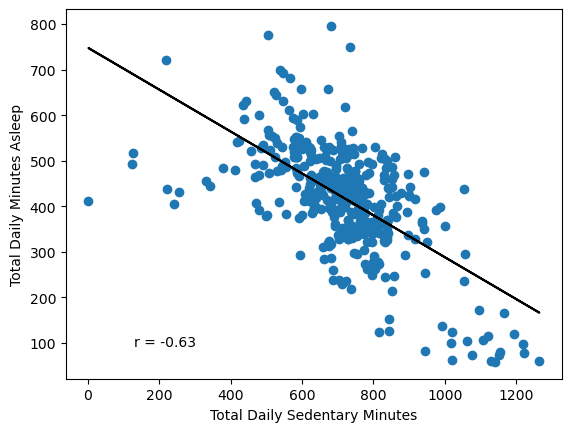

In [129]:
x = daily_activity_sleep["SedentaryMinutes"]
y = daily_activity_sleep["TotalMinutesAsleep"]

plt.scatter(x, y)

coefficients = np.polyfit(x, y, deg=1)
slope = coefficients[0]
intercept = coefficients[1]
regression_line = slope * x + intercept

plt.plot(x, regression_line, color='black')

r_value = np.corrcoef(x, y)[0, 1]
plt.text(0.2, 0.1, f'r = {r_value:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel("Total Daily Sedentary Minutes")
plt.ylabel("Total Daily Minutes Asleep")

plt.show()

There is a negative correlation between sedentary time and sleep duration, suggesting prolonged sitting negatively affects the duration of sleep.

In [130]:
daily_activity_sleep.head()

,Id,TotalMinutesAsleep,TotalSteps,SedentaryMinutes,Calories,METs
0,1503960366,327,13162,728,1985,1.752847
1,1503960366,384,10735,776,1797,1.587431
2,1503960366,412,9762,726,1745,1.540972
3,1503960366,340,12669,773,1863,1.645417
4,1503960366,700,9705,539,1728,1.525833


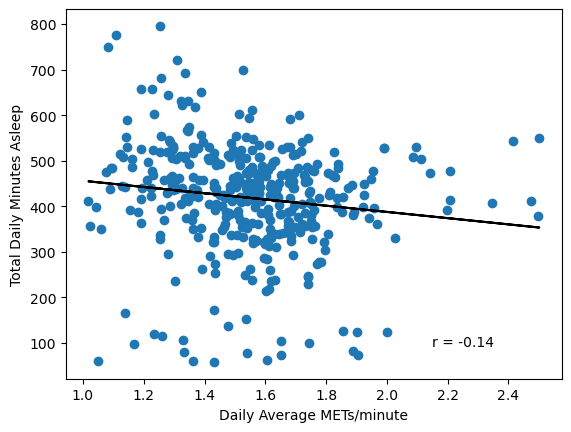

In [131]:
x = daily_activity_sleep["METs"]
y = daily_activity_sleep["TotalMinutesAsleep"]

plt.scatter(x, y)

coefficients = np.polyfit(x, y, deg=1)
slope = coefficients[0]
intercept = coefficients[1]
regression_line = slope * x + intercept

plt.plot(x, regression_line, color='black')

r_value = np.corrcoef(x, y)[0, 1]
plt.text(0.8, 0.1, f'r = {r_value:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel("Daily Average METs/minute")
plt.ylabel("Total Daily Minutes Asleep")

plt.show()

To explore the relationship between physical activity and sleep duration, Metabolic Equivalent Tasks (METs) were used as a physical activity metric. MET is defined as a rate of energy expended during an activity compared to the rate of energy expended during rest. 1 REM is equivalent to a persont resting in a sedentary state, while activities that require MET > 1.5 are generally considered light physical activity (http://dx.doi.org/10.2196/36181). 

No obvious relationship is observed between average daily activity expressed in average daily METs and sleep duration. This is in contrast to observations in sedentary time vs sleep duration graph. It is possible that daily sedentary time might not reflect the overall person's physical activity very accurately.

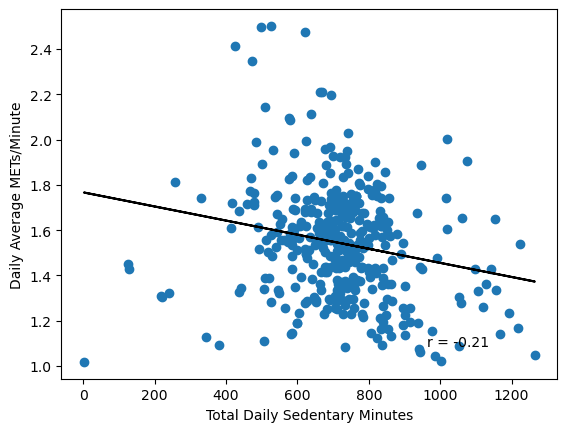

In [132]:
x = daily_activity_sleep["SedentaryMinutes"]
y = daily_activity_sleep["METs"]

plt.scatter(x, y)

coefficients = np.polyfit(x, y, deg=1)
slope = coefficients[0]
intercept = coefficients[1]
regression_line = slope * x + intercept

plt.plot(x, regression_line, color='black')

r_value = np.corrcoef(x, y)[0, 1]
plt.text(0.8, 0.1, f'r = {r_value:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel("Total Daily Sedentary Minutes")
plt.ylabel("Daily Average METs/Minute")

plt.show()

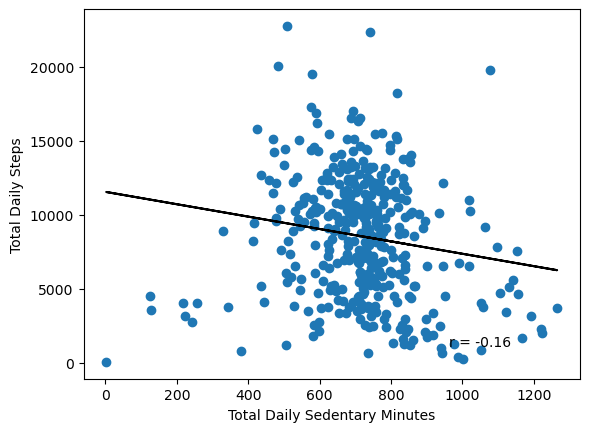

In [133]:
x = daily_activity_sleep["SedentaryMinutes"]
y = daily_activity_sleep["TotalSteps"]

plt.scatter(x, y)

coefficients = np.polyfit(x, y, deg=1)
slope = coefficients[0]
intercept = coefficients[1]
regression_line = slope * x + intercept

plt.plot(x, regression_line, color='black')

r_value = np.corrcoef(x, y)[0, 1]
plt.text(0.8, 0.1, f'r = {r_value:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel("Total Daily Sedentary Minutes")
plt.ylabel("Total Daily Steps")

plt.show()

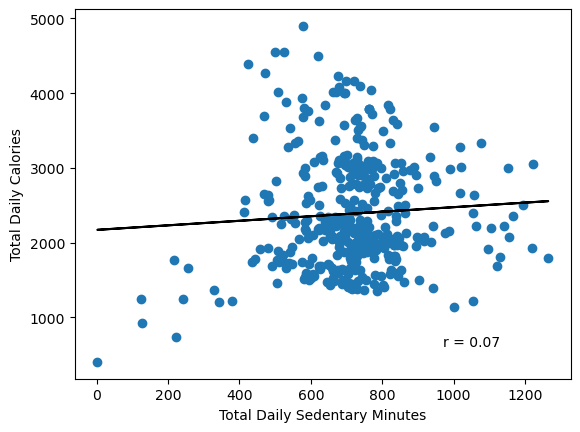

In [134]:
x = daily_activity_sleep["SedentaryMinutes"]
y = daily_activity_sleep["Calories"]

plt.scatter(x, y)

coefficients = np.polyfit(x, y, deg=1)
slope = coefficients[0]
intercept = coefficients[1]
regression_line = slope * x + intercept

plt.plot(x, regression_line, color='black')

r_value = np.corrcoef(x, y)[0, 1]
plt.text(0.8, 0.1, f'r = {r_value:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel("Total Daily Sedentary Minutes")
plt.ylabel("Total Daily Calories")

plt.show()

Indeed, it appears that total daily sedentary time is not a great predictor of persons total daily activity (measured as daily average METs/minute or total daily steps) or total daily energy expenditure (total daily calories).

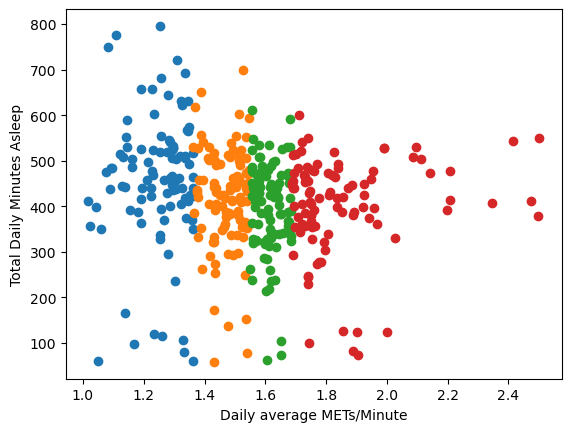

In [135]:
daily_activity_sleep['METs_Quartile'] = pandas.qcut(daily_activity_sleep['METs'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
for quartile in ['Q1', 'Q2', 'Q3', 'Q4']:
    plt.scatter(daily_activity_sleep.loc[daily_activity_sleep['METs_Quartile'] == quartile, 'METs'],
                daily_activity_sleep.loc[daily_activity_sleep['METs_Quartile'] == quartile, 'TotalMinutesAsleep'])

plt.xlabel("Daily average METs/Minute")
plt.ylabel("Total Daily Minutes Asleep")
plt.show()

Although no upward or downward trends are observed in the average daily MET minutes vs total minutes asleep graph, when data is split into quartiles, data variability seems to decrease as average daily MET minutes increase.

In [136]:
daily_activity_sleep.groupby("METs_Quartile")["TotalMinutesAsleep"].describe()

,count,mean,std,min,25%,50%,75%,max
METs_Quartile,,,,,,,,
Q1,99.0,457.969697,146.282607,59.0,407.5,463.0,526.00,796.0
Q2,99.0,418.232323,111.491267,58.0,358.0,432.0,495.50,700.0
Q3,98.0,396.102041,100.706114,62.0,338.0,417.0,466.75,611.0
Q4,97.0,401.907216,106.604319,74.0,361.0,418.0,472.00,600.0


In [137]:
daily_activity_sleep.groupby("METs_Quartile")["METs"].describe()

,count,mean,std,min,25%,50%,75%,max
METs_Quartile,,,,,,,,
Q1,99.0,1.246579,0.091446,1.018056,1.189826,1.276111,1.321001,1.362014
Q2,99.0,1.468878,0.053821,1.363611,1.430764,1.478125,1.515382,1.546875
Q3,98.0,1.612353,0.040929,1.549722,1.577535,1.612500,1.644080,1.685556
Q4,97.0,1.854094,0.187586,1.688542,1.732083,1.777569,1.905486,2.501667


In [138]:
from scipy.stats import levene
for quartile_1 in ['Q1', 'Q2', 'Q3', 'Q4']:
    for quartile_2 in ['Q1', 'Q2', 'Q3', 'Q4']:
        if quartile_1 != quartile_2:
            statistic, p_value = levene(daily_activity_sleep.loc[daily_activity_sleep['METs_Quartile'] == quartile_1, 'TotalMinutesAsleep'], daily_activity_sleep.loc[daily_activity_sleep['METs_Quartile'] == quartile_2, 'TotalMinutesAsleep'])
            print(f"P-value ({quartile_1} and {quartile_2}): {p_value:.2f}")

P-value (Q1 and Q2): 0.14
P-value (Q1 and Q3): 0.05
P-value (Q1 and Q4): 0.06
P-value (Q2 and Q1): 0.14
P-value (Q2 and Q3): 0.60
P-value (Q2 and Q4): 0.63
P-value (Q3 and Q1): 0.05
P-value (Q3 and Q2): 0.60
P-value (Q3 and Q4): 0.99
P-value (Q4 and Q1): 0.06
P-value (Q4 and Q2): 0.63
P-value (Q4 and Q3): 0.99


Although the average sleep duration is close to the recommended 7 hours, it seems that the standard deviation of data in the first quartile is higher than that in the other quartiles. This suggests, that higher average daily MET minutes might be associated with more consistent nightly sleep duration. This might be important as both under- and oversleeping are known to be detrimental to health.

In [139]:
daily_activity_sleep['SleepQuality'] = ''
daily_activity_sleep.loc[daily_activity_sleep['TotalMinutesAsleep'] > 480, 'SleepQuality'] = 'oversleeping'
daily_activity_sleep.loc[daily_activity_sleep['TotalMinutesAsleep'] < 360, 'SleepQuality'] = 'undersleeping'
daily_activity_sleep.loc[(daily_activity_sleep['TotalMinutesAsleep'] >= 360) & (daily_activity_sleep['TotalMinutesAsleep'] <= 480), 'SleepQuality'] = 'normal'

In [140]:
daily_activity_sleep_grouped = daily_activity_sleep.groupby(["METs_Quartile", "SleepQuality"]).size().unstack()
total = daily_activity_sleep_grouped["normal"] + daily_activity_sleep_grouped["oversleeping"] + daily_activity_sleep_grouped["undersleeping"]
daily_activity_sleep_grouped = daily_activity_sleep_grouped.div(total, axis=0) * 100

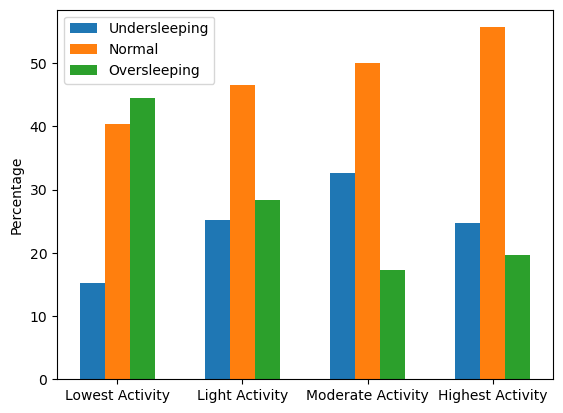

In [141]:
x_labels = ['Sedentary', 'LightlyActive', 'FairlyActive', 'VeryActive']
bar_width = 0.2

pos_undersleeping = list(range(len(x_labels)))
pos_normal = [pos + bar_width for pos in pos_undersleeping]
pos_oversleeping = [pos + bar_width for pos in pos_normal]

plt.bar(pos_undersleeping, daily_activity_sleep_grouped['undersleeping'], width=bar_width, label='Undersleeping')
plt.bar(pos_normal, daily_activity_sleep_grouped['normal'], width=bar_width, label='Normal')
plt.bar(pos_oversleeping, daily_activity_sleep_grouped['oversleeping'], width=bar_width, label='Oversleeping')

plt.ylabel('Percentage')

plt.xticks([pos + bar_width for pos in range(len(x_labels))], ["Lowest Activity", "Light Activity", "Moderate Activity", "Highest Activity"])

plt.legend()

plt.show()

<h3>Testing if the increase in the proportion of normal duration sleep events in the highest activity quartile is significantly different from the lowest activity quartile</h3>

In [142]:
daily_activity_sleep_stats = daily_activity_sleep.copy()
daily_activity_sleep_stats['SleepQuality'] = ''
daily_activity_sleep_stats.loc[daily_activity_sleep_stats['TotalMinutesAsleep'] > 480, 'SleepQuality'] = "abnormal"
daily_activity_sleep_stats.loc[daily_activity_sleep_stats['TotalMinutesAsleep'] < 360, 'SleepQuality'] = "abnormal"
daily_activity_sleep_stats.loc[(daily_activity_sleep_stats['TotalMinutesAsleep'] >= 360) & (daily_activity_sleep_stats['TotalMinutesAsleep'] <= 480), 'SleepQuality'] = "normal"

Normal duration sleep events reclassified as "good", undersleeping and oversleeping events classified as "bad".

In [143]:
contingency_table = daily_activity_sleep_stats[["METs_Quartile", "SleepQuality"]].groupby("METs_Quartile").value_counts()
contingency_table = contingency_table.reset_index()
contingency_table = contingency_table.rename(columns={0:"counts"})
contingency_table = contingency_table.pivot(index='METs_Quartile', columns='SleepQuality', values='counts')
contingency_table = contingency_table.reset_index()
contingency_table

SleepQuality,METs_Quartile,abnormal,normal
0,Q1,59,40
1,Q2,53,46
2,Q3,49,49
3,Q4,43,54


In [144]:
import numpy as np
from scipy.stats import chi2_contingency
for quartile_1 in ['Q1', 'Q2', 'Q3', 'Q4']:
    for quartile_2 in ['Q1', 'Q2', 'Q3', 'Q4']:
        if quartile_1 != quartile_2:
            observed_data = contingency_table[contingency_table["METs_Quartile"].isin([quartile_1, quartile_2])][["abnormal", "normal"]].values.tolist()
            chi2, p_value, dof, expected = chi2_contingency(observed_data)
            print(f"P-value ({quartile_1} and {quartile_2}): {p_value:.2f}")

P-value (Q1 and Q2): 0.47
P-value (Q1 and Q3): 0.23
P-value (Q1 and Q4): 0.05
P-value (Q2 and Q1): 0.47
P-value (Q2 and Q3): 0.72
P-value (Q2 and Q4): 0.25
P-value (Q3 and Q1): 0.23
P-value (Q3 and Q2): 0.72
P-value (Q3 and Q4): 0.52
P-value (Q4 and Q1): 0.05
P-value (Q4 and Q2): 0.25
P-value (Q4 and Q3): 0.52


In [145]:
daily_activity_sleep.groupby("METs_Quartile")["METs"].describe()

,count,mean,std,min,25%,50%,75%,max
METs_Quartile,,,,,,,,
Q1,99.0,1.246579,0.091446,1.018056,1.189826,1.276111,1.321001,1.362014
Q2,99.0,1.468878,0.053821,1.363611,1.430764,1.478125,1.515382,1.546875
Q3,98.0,1.612353,0.040929,1.549722,1.577535,1.612500,1.644080,1.685556
Q4,97.0,1.854094,0.187586,1.688542,1.732083,1.777569,1.905486,2.501667


The MET quartiles were classified as 'Lowest Activity' (1.018056 - 1.364236 average daily MET/minute), 'Light Activity' (1.369375 - 1.546875 average daily MET/minute), 'Moderate Activity' (1.549722 - 1.688889 average daily MET/minute), 'Highest Activity' (1.688542 - 2.501667 average daily MET/minute) categories from the lowest to the highest. Sleep duration was grouped into 'undersleeping' (<6 hrs), 'normal' (6-8 hrs), and 'oversleeping' (>8 hrs). Although it seems that people with the lowest physical activity seem to undersleep less than other groups, it appears to be due to their higher tendency to oversleep. Even light physical activity seems to positively affect the duration of sleep favouring sleep duration within the optimal range. 

There is also a tread showing and increase in the fraction of sleep events with normal duration as physical activity increases. The difference between the fraction of normal duration sleep events in the lowest activity and highest activity quartiles did not pass the threshold of statistical significance. However, the p-value was very close to the threshold (p = 0.06), suggesting that the difference between the quartiles might be real. As the power of chi-square test increases with sample size, a higher sample size could be used to verify that the difference between the bottom and top quartiles is real.

daily_activity_sleep.to_csv("activity_sleep_data_cleaned.csv")

<h3>Average Hourly Intensities</h3>

In [146]:
hourly_intensities["ActivityHour"] = hourly_intensities["ActivityHour"].dt.time

In [147]:
hourly_intensities_grouped = hourly_intensities.groupby("ActivityHour").mean().reset_index()[["ActivityHour", "AverageIntensity"]]
hourly_intensities_grouped['ActivityHourPlot'] = hourly_intensities_grouped['ActivityHour'].apply(lambda x: x.hour * 1)
hourly_intensities_grouped.dtypes

ActivityHour         object
AverageIntensity    float64
ActivityHourPlot      int64
dtype: object

In [148]:
hourly_intensities_grouped["ActivityHour"] = hourly_intensities_grouped["ActivityHour"].apply(lambda x: x.strftime("%H:%M"))

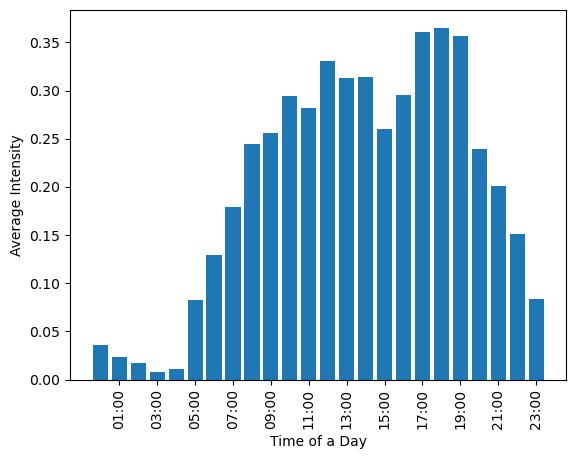

In [149]:
x = hourly_intensities_grouped["ActivityHourPlot"]
y = hourly_intensities_grouped["AverageIntensity"]

plt.bar(x, y)

plt.xlabel("Time of a Day")
plt.ylabel("Average Intensity")

plt.xticks(hourly_intensities_grouped["ActivityHourPlot"][1::2], hourly_intensities_grouped["ActivityHour"][1::2], rotation="vertical")

plt.show()

hourly_intensities_grouped.to_csv("hourly_intensities_cleaned.csv")

<h2>Calculating the Level of Physical Activity Required to Achieve 1.5 Daily Average METs/minute</h2>

In [150]:
average_daily_met["METs"].describe()

count    934.000000
mean       1.466396
std        0.290326
min        1.000000
25%        1.271024
50%        1.469618
75%        1.640677
max        2.577569
Name: METs, dtype: float64

In [151]:
from sympy import *

for MET in [3, 6, 9]:
    x, y = symbols('x y')
    eq1 = Eq((1*x + MET*y)/24, 1.5)
    eq2 = Eq(x + y, 24)
    solution = solve((eq1,eq2), (x, y))
    print(f"{solution[y]:.2f} hours of activity at {MET} METs")

6.00 hours of activity at 3 METs
2.40 hours of activity at 6 METs
1.50 hours of activity at 9 METs


To reach 1.5 daily average METs/minute associated with more consistent sleep duration and more sleep events with a duration that falls within the normal range, people need to accumulate at least 6 hours of light activity, like slow walking, or 2.4 hours of moderate activity, like brisk walking, or 1.5 hours of intense physical activity, like running (https://doi.org/10.1371%2Fjournal.pone.0200701). This seems to be quite feasible as the average daily METs/minute of people who participated in this study is 1.47.